# Problems from McDonald (2013)

## 14.4

In [49]:
import numpy as np

def american_put_price_binomial_one_period(S, K_list, r, sigma, delta, h):
    u = np.exp(sigma * np.sqrt(h))
    d = np.exp(-sigma * np.sqrt(h))
    q = (np.exp((r - delta) * h) - d) / (u - d)

    results = {}
    for K in K_list:
        Su = S * u
        Sd = S * d
        Pu = max(K - Su, 0)
        Pd = max(K - Sd, 0)
        P0_european = np.exp(-r * h) * (q * Pu + (1 - q) * Pd)
        intrinsic_value = max(K - S, 0)
        P0_american = max(P0_european, intrinsic_value)
        early_exercise = P0_american > P0_european
        results[K] = {"american_put_price": P0_american, "early_exercise": early_exercise}
    return results

S = 100
K_list = [100, 110, 120, 130]
r = 0.08
sigma = 0.30
delta = 0
h = 1

put_prices = american_put_price_binomial_one_period(S, K_list, r, sigma, delta, h)

for K, result in put_prices.items():
    print(f"Strike = ${K}: Put Price = ${result['american_put_price']:.2f}, Early Exercise = {result['early_exercise']}\n")

Strike = $100: Put Price = $10.47, Early Exercise = False

Strike = $110: Put Price = $14.51, Early Exercise = False

Strike = $120: Put Price = $20.00, Early Exercise = True

Strike = $130: Put Price = $30.00, Early Exercise = True



### (a)

As can be seen from the code output, early exercise occurs at strikes $K = $120 and $K = $130 because for these strikes, the intrinsic value at time 0 is greater than the European put option price.

### (b)
For strikes $K = $100 and $K = $110, early exercise does not occur.  Put-call parity for European options is $C + Ke^{-rT} = P + S$. Rearranging, $P = C + Ke^{-rT} - S$. For a non-dividend paying stock, early exercise is never optimal for American call options. This implies that the American call price is equal to the European call price.  From put-call parity, the European put price is related to the European call price. When the strike price is lower, the time value of the put option is higher than its immediate intrinsic value. This time value arises from the possibility of the stock price decreasing further, increasing the put's payoff at expiration. For lower strikes, this potential gain from waiting exceeds the benefit of immediate exercise, making it suboptimal to exercise early. In essence, the put option retains a valuable time premium at lower strikes, making it more beneficial to hold onto the option rather than exercise it immediately.

## 11.12

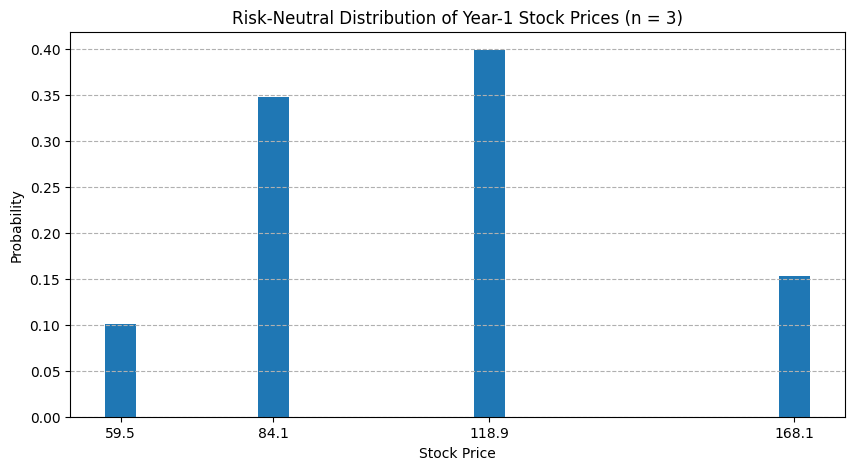

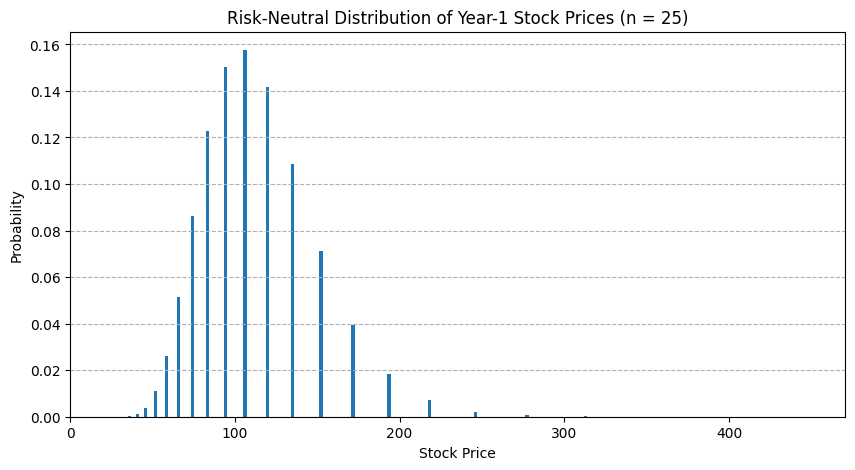

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

S0 = 100
sigma = 0.30
r = 0.08
t = 1
delta = 0

def binomial_distribution(n):
    h = t / n
    u = np.exp(sigma * np.sqrt(h))
    d = np.exp(-sigma * np.sqrt(h))
    p_star = (np.exp((r - delta) * h) - d) / (u - d)
    stock_prices = []
    probabilities = []
    for i in range(n + 1):
        stock_price = S0 * (u**(n - i)) * (d**i)
        probability = comb(n, i) * (p_star**(n - i)) * ((1 - p_star)**i)
        stock_prices.append(stock_price)
        probabilities.append(probability)
    return stock_prices, probabilities

n1 = 3
stock_prices_n1, probabilities_n1 = binomial_distribution(n1)

n2 = 25
stock_prices_n2, probabilities_n2 = binomial_distribution(n2)

plt.figure(figsize=(10, 5))
plt.bar(stock_prices_n1, probabilities_n1, width=5, align='center')
plt.title(f'Risk-Neutral Distribution of Year-1 Stock Prices (n = {n1})')
plt.xlabel('Stock Price')
plt.ylabel('Probability')
plt.xticks(stock_prices_n1)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(stock_prices_n2, probabilities_n2, width=2, align='center')
plt.title(f'Risk-Neutral Distribution of Year-1 Stock Prices (n = {n2})')
plt.xlabel('Stock Price')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

The python code calculates and plots the risk-neutral distribution for $n=3$ and $n=25$.
The first plot for $n=3$ shows a discrete distribution with 4 bars.
The second plot for $n=25$ shows a distribution that starts to resemble a continuous distribution, as expected when $n$ increases.
These plots visually represent the risk-neutral distribution of the stock price at year 1 for both cases.

# Exam problems

## Exam problem 1

The answer is calculated in the attached notebook.

In [51]:
S0 = 500
sigma = 0.10
r = 0.08
delta = 0.03
T = 3
K = 500
n = 3
h = T / n

u = np.exp(sigma * np.sqrt(h))
d = np.exp(-sigma * np.sqrt(h))
q = (np.exp((r - delta) * h) - d) / (u - d)
discount_factor = np.exp(-r * h)

stock_tree = {}
for i in range(n + 1):
    for j in range(i + 1):
        stock_price = S0 * (u**(i - j)) * (d**j)
        node_name = 'S' + 'u'*(i-j) + 'd'*j
        stock_tree[node_name] = stock_price

option_tree = {}

for j in range(n + 1):
    node_name = 'C' + 'u'*(n-j) + 'd'*j
    stock_price = stock_tree['S' + 'u'*(n-j) + 'd'*j]
    option_price = max(stock_price - K, 0)
    option_tree[node_name] = option_price

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        node_name = 'C' + 'u'*(i-j) + 'd'*j
        node_name_u = 'C' + 'u'*(i+1-j) + 'd'*j
        node_name_d = 'C' + 'u'*(i-j) + 'd'*(j+1)
        expected_option_price = discount_factor * (q * option_tree[node_name_u] + (1 - q) * option_tree[node_name_d])
        stock_price_current_node = stock_tree['S' + 'u'*(i-j) + 'd'*j]
        intrinsic_value = max(stock_price_current_node - K, 0)
        option_price = max(intrinsic_value, expected_option_price) 
        option_tree[node_name] = option_price

### a.

In [58]:
print(f"$$S = {stock_tree['S']:.2f}$$\n")
print(f"$$Su = {stock_tree['Su']:.2f}, Sd = {stock_tree['Sd']:.2f}$$\n")
print(f"$$Suu = {stock_tree['Suu']:.2f}, Sud = {stock_tree['Sud']:.2f}, Sdd = {stock_tree['Sdd']:.2f}$$\n")
print(f"$$Suuu = {stock_tree['Suuu']:.2f}, Suud = {stock_tree['Suud']:.2f}, Sudd = {stock_tree['Sudd']:.2f}, Sddd = {stock_tree['Sddd']:.2f}$$\n")

$$S = 500.00$$

$$Su = 552.59, Sd = 452.42$$

$$Suu = 610.70, Sud = 500.00, Sdd = 409.37$$

$$Suuu = 674.93, Suud = 552.59, Sudd = 452.42, Sddd = 370.41$$



### b.

In [59]:
print(f"$$C = {option_tree['C']:.2f}$$\n")
print(f"$$Cu = {option_tree['Cu']:.2f}, Cd = {option_tree['Cd']:.2f}$$\n")
print(f"$$Cuu = {option_tree['Cuu']:.2f}, Cud = {option_tree['Cud']:.2f}, Cdd = {option_tree['Cdd']:.2f}$$\n")
print(f"$$Cuuu = {option_tree['Cuuu']:.2f}, Cuud = {option_tree['Cuud']:.2f}, Cudd = {option_tree['Cudd']:.2f}, Cddd = {option_tree['Cddd']:.2f}$$\n")

$$C = 71.58$$

$$Cu = 97.27, Cd = 23.94$$

$$Cuu = 131.09, Cud = 35.48, Cdd = 0.00$$

$$Cuuu = 174.93, Cuud = 52.59, Cudd = 0.00, Cddd = 0.00$$



## Exam problem 2

### a.
Expected stock price in 3 months:
The expected stock price is given by $E[S_t] = S_0 e^{(\alpha - \delta) t}$.
$$E[S_{0.25}] = 50 \times e^{(0.10 - 0.01) \times 0.25} = 50 \times e^{0.09 \times 0.25} = 50 \times e^{0.0225}$$
The answer is calculated in the attached notebook.

In [54]:
S0 = 50
alpha = 0.10
delta = 0.01
sigma = 0.30
t = 0.25

expected_St = S0 * np.exp((alpha - delta) * t)
print(f"Expected stock price in 3 months: {expected_St:.2f}\n")

Expected stock price in 3 months: 51.14



### b.
A 95% confidence interval for the stock price in 3 months:
First, calculate $\mu = (\alpha - \delta - \frac{1}{2} \sigma^2) t$ and $\nu = \sigma \sqrt{t}$.
$$\mu = (0.10 - 0.01 - 0.5 \times 0.30^2) \times 0.25 = 0.01125$$
$$\nu = 0.30 \times \sqrt{0.25} = 0.15$$
The 95% confidence interval for $ln(S_t/S_0)$ is $[\mu - 1.96 \nu, \mu + 1.96 \nu]$.
The 95% confidence interval for $S_t$ is $[S_0 e^{\mu - 1.96 \nu}, S_0 e^{\mu + 1.96 \nu}]$.
Lower bound: $50 \times e^{0.01125 - 1.96 \times 0.15} \approx 37.68$
Upper bound: $50 \times e^{0.01125 + 1.96 \times 0.15} \approx 67.85$
The answer is calculated in the attached notebook.

In [55]:
mu = (alpha - delta - 0.5 * sigma**2) * t
nu = sigma * np.sqrt(t)
lower_bound = S0 * np.exp(mu - 1.96 * nu)
upper_bound = S0 * np.exp(mu + 1.96 * nu)
print(f"95% confidence interval for stock price in 3 months: [{lower_bound:.2f}, {upper_bound:.2f}]\n")

95% confidence interval for stock price in 3 months: [37.69, 67.85]



### c.
The probability that the stock price in 3 months is higher than 55:
We need to calculate $P(S_{0.25} > 55) = \Phi(\frac{ln(S_0) + \mu - ln(55)}{\nu})$.
$$P(S_{0.25} > 55) = \Phi\left(\frac{ln(50) + 0.01125 - ln(55)}{0.15}\right)$$
The answer is calculated in the attached notebook.

In [56]:
import scipy.stats as si

K = 55
prob_higher_than_55 = si.norm.cdf((np.log(S0) + mu - np.log(K)) / nu)

print(f"Probability that stock price in 3 months is higher than 55: {prob_higher_than_55:.4f}")

Probability that stock price in 3 months is higher than 55: 0.2876
